<a href="https://colab.research.google.com/github/sayaliambure/Cat-vs-Dog-classification/blob/main/CatvsDog_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 177MB/s]
100% 1.06G/1.06G [00:05<00:00, 225MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout

In [ ]:
#generators - divides data into small batches
#here generator used is - Image dataset From Directory

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = "inferred",
    label_mode = "int",
  batch_size=32,
  image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = "inferred",
    label_mode = "int",
  batch_size=32,
  image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize, initial img pixels are from 0-255, we need 0-1
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
from keras.engine import input_layer
#CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())    #round2
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())    #round2
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())    #round2
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))     #round2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))     #round2
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 104ms/step - loss: 1.0339 - accuracy: 0.6148 - val_loss: 0.5706 - val_accuracy: 0.6996
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5369 - accuracy: 0.7258 - val_loss: 0.5212 - val_accuracy: 0.7458
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4587 - accuracy: 0.7815 - val_loss: 0.4812 - val_accuracy: 0.7782
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3850 - accuracy: 0.8257 - val_loss: 0.5231 - val_accuracy: 0.7546
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3172 - accuracy: 0.8625 - val_loss: 0.4610 - val_accuracy: 0.7844
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2306 - accuracy: 0.9053 - val_loss: 0.4585 - val_accuracy: 0.8286
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1441 - accuracy: 0.9424 - val_loss: 0.6113 - val_ac

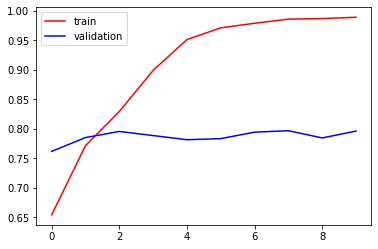

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

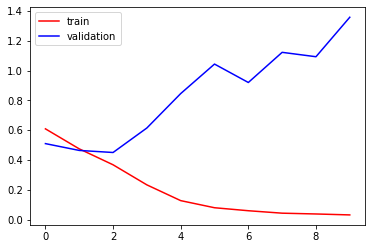

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# Ways to reduce overfitting
# Add more data
# Data Augmentation
# L1/L2 Regularization
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
print(test_img.shape)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)